Spatial analysis is a set of methods and technologies for extracting information from geographic data. The data becomes information the moment a user adds a purpose to reveal it: by processing and analyzing the input data, it is possible to represent the information related to the identified problem.

# Load Libraries

In [1]:
pip install rioxarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for rioxarray: filename=rioxarray-0.9.1-py3-none-any.whl size=54590 sha256=7d7021535324d544cb2a9ef2335611f0e2b0fa17f74e78006085a319110017af
  Stored in directory: /root/.cache/pip/wheels/03/b2/26/2e2cc1797ac99cc070d2cae87c340bd3429bbb583c90b1c780
Successfully built rioxarray
Note: you may need to restart the kernel to use updated packages.


In [2]:
import rioxarray as rxr
from shapely.geometry import mapping
import rasterio
import geopandas as gpd
import os
import matplotlib.pyplot as plt

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


# Read Vector and Raster Layers

To open a shapefile you use the gpd.read_file() function from geopandas. This layer is the extension of our area study, bordered by polygons. Our area is the island of Sardinia (Italy) located in the Mediterranean Sea. Specifically, it is a shapefile containing habitats of priority at the European level.

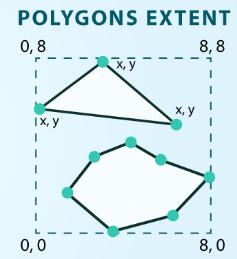

In [3]:
# Polygons of our study area
CNAT = gpd.read_file("/kaggle/input/cnat-2013/CNAT_SAR2013_v1.shp")
# convert to EPSG:4326, which corresponds to coordinates in latitude and longitude.
CNAT = CNAT.to_crs("EPSG:4326")

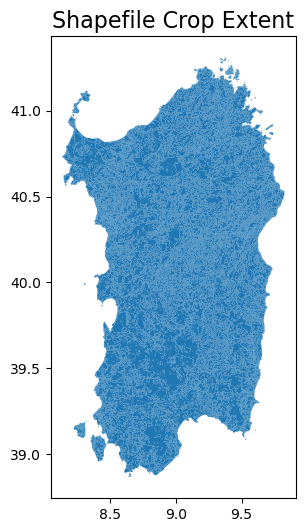

In [4]:
# Plot the extension of our area
fig, ax = plt.subplots(figsize=(6, 6))

CNAT.plot(ax=ax)

ax.set_title("Shapefile Crop Extent",
             fontsize=16)
plt.show()

**Open Raster layers**

Our raster layers are 19 bioclimatic variables extracted from  [WorldClim](https://www.worldclim.org/data/worldclim21.html). They are the average for the years 1970-2000. The data is available at the four spatial resolutions, between 30 seconds (approx. 1 km2) to 10 minutes (approx. 340 km2). For this notebook I chose 2.5 minutes. These TIF files represent the global climate history.

In [5]:
b1 = rxr.open_rasterio("/kaggle/input/bioclimatic-variables/Bio_1.tif", masked=True).squeeze()
b2 = rxr.open_rasterio("/kaggle/input/bioclimatic-variables/Bio_2.tif", masked=True).squeeze()
b3 = rxr.open_rasterio("/kaggle/input/bioclimatic-variables/Bio_3.tif", masked=True).squeeze()
b4 = rxr.open_rasterio("/kaggle/input/bioclimatic-variables/Bio_4.tif", masked=True).squeeze()
b5 = rxr.open_rasterio("/kaggle/input/bioclimatic-variables/Bio_5.tif", masked=True).squeeze()
b6 = rxr.open_rasterio("/kaggle/input/bioclimatic-variables/Bio_6.tif", masked=True).squeeze()
b7 = rxr.open_rasterio("/kaggle/input/bioclimatic-variables/Bio_7.tif", masked=True).squeeze()
b8 = rxr.open_rasterio("/kaggle/input/bioclimatic-variables/Bio_8.tif", masked=True).squeeze()
b9 = rxr.open_rasterio("/kaggle/input/bioclimatic-variables/Bio_9.tif", masked=True).squeeze()
b10 = rxr.open_rasterio("/kaggle/input/bioclimatic-variables/Bio_10.tif", masked=True).squeeze()
b11 = rxr.open_rasterio("/kaggle/input/bioclimatic-variables/Bio_11.tif", masked=True).squeeze()
b12 = rxr.open_rasterio("/kaggle/input/bioclimatic-variables/Bio_12.tif", masked=True).squeeze()
b13 = rxr.open_rasterio("/kaggle/input/bioclimatic-variables/Bio_13.tif", masked=True).squeeze()
b14 = rxr.open_rasterio("/kaggle/input/bioclimatic-variables/Bio_14.tif", masked=True).squeeze()
b15 = rxr.open_rasterio("/kaggle/input/bioclimatic-variables/Bio_15.tif", masked=True).squeeze()
b16 = rxr.open_rasterio("/kaggle/input/bioclimatic-variables/Bio_16.tif", masked=True).squeeze()
b17 = rxr.open_rasterio("/kaggle/input/bioclimatic-variables/Bio_17.tif", masked=True).squeeze()
b18 = rxr.open_rasterio("/kaggle/input/bioclimatic-variables/Bio_18.tif", masked=True).squeeze()
b19 = rxr.open_rasterio("/kaggle/input/bioclimatic-variables/Bio_19.tif", masked=True).squeeze()

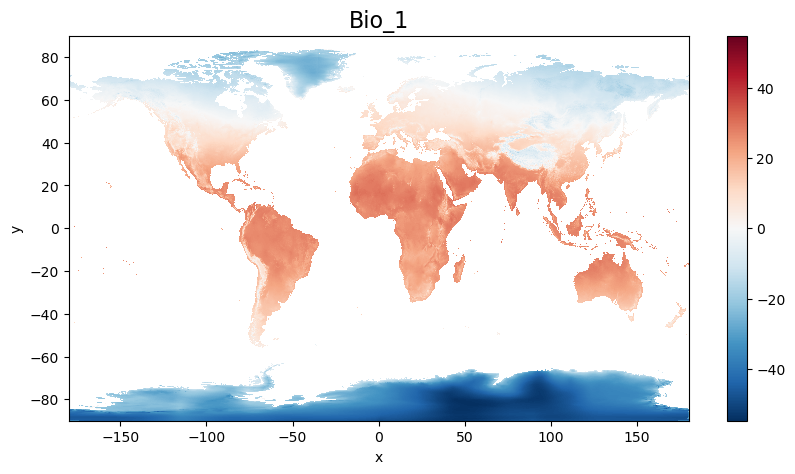

In [6]:
# Plot one file raster
fig, ax = plt.subplots(figsize=(10, 5))

# Bio_1 as example
b1.plot(ax=ax)

ax.set_title("Bio_1",
             fontsize=16)
plt.show()

# Clip Raster Data Using RioXarray .clip

Clipping rasters allows you to only work on or display a certain area of interest. It could be defined by a boundary from a vector shapefile, or it could be defined by the extent of the window. In our case we already have the extent of our study area, defined by the CNAT dataset. 

Remember that in order to perform any analysis with these two datasets together, they will need to be in the same CRS.

In [7]:
print('crop extent crs: ', CNAT.crs)
print('Bio_1 crs: ', b1.rio.crs) #Bio_1 is chosen randomly, so all 19 variables have the same crs

crop extent crs:  EPSG:4326
Bio_1 crs:  EPSG:4326


In [8]:
# 'CNAT.crs' in the code below is needed if your GDF is in a diff CRS than the raster data
b1_clip = b1.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
b2_clip = b2.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
b3_clip = b3.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
b4_clip = b4.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
b5_clip = b5.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
b6_clip = b6.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
b7_clip = b7.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
b8_clip = b8.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
b9_clip = b9.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
b10_clip = b10.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
b11_clip = b11.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
b12_clip = b12.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
b13_clip = b13.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
b14_clip = b14.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
b15_clip = b15.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
b16_clip = b16.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
b17_clip = b17.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
b18_clip = b18.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
b19_clip = b19.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)

# Write (export) to a new geotiff file

You can observe that the new bioclimatic variables are restricted only for our study area

In [9]:
b1_clip.rio.to_raster('Bio_1_clip.tif')
b2_clip.rio.to_raster('Bio_2_clip.tif')
b3_clip.rio.to_raster('Bio_3_clip.tif')
b4_clip.rio.to_raster('Bio_4_clip.tif')
b5_clip.rio.to_raster('Bio_5_clip.tif')
b6_clip.rio.to_raster('Bio_6_clip.tif')
b7_clip.rio.to_raster('Bio_7_clip.tif')
b8_clip.rio.to_raster('Bio_8_clip.tif')
b9_clip.rio.to_raster('Bio_9_clip.tif')
b10_clip.rio.to_raster('Bio_10_clip.tif')
b11_clip.rio.to_raster('Bio_11_clip.tif')
b12_clip.rio.to_raster('Bio_12_clip.tif')
b13_clip.rio.to_raster('Bio_13_clip.tif')
b14_clip.rio.to_raster('Bio_14_clip.tif')
b15_clip.rio.to_raster('Bio_15_clip.tif')
b16_clip.rio.to_raster('Bio_16_clip.tif')
b17_clip.rio.to_raster('Bio_17_clip.tif')
b18_clip.rio.to_raster('Bio_18_clip.tif')
b19_clip.rio.to_raster('Bio_19_clip.tif')

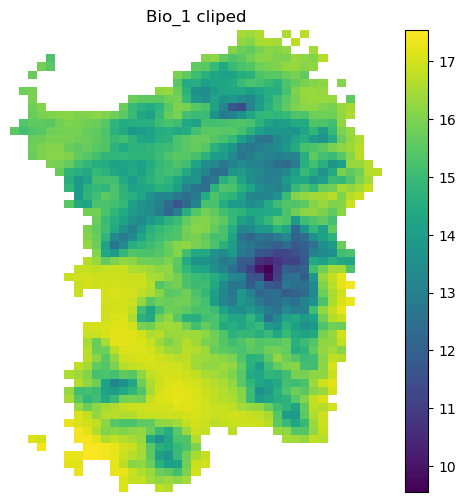

In [10]:
f, ax = plt.subplots(figsize=(6, 6))

# Bio_1 as example
b1_clip.plot.imshow()
ax.set(title="Bio_1 cliped")

ax.set_axis_off()
plt.show()

# Precipitation

We apply the same codes to the precipitation (mm) variables, which we can find in [WorldClim](https://www.worldclim.org/data/worldclim21.html). They represent average monthly (12 months) climate data for 1970-2000. 

In [12]:
prec1 = rxr.open_rasterio("/kaggle/input/precipitations/wc2.1_2.5m_prec_01.tif", masked=True).squeeze()
prec2 = rxr.open_rasterio("/kaggle/input/precipitations/wc2.1_2.5m_prec_02.tif", masked=True).squeeze()
prec3 = rxr.open_rasterio("/kaggle/input/precipitations/wc2.1_2.5m_prec_03.tif", masked=True).squeeze()
prec4 = rxr.open_rasterio("/kaggle/input/precipitations/wc2.1_2.5m_prec_04.tif", masked=True).squeeze()
prec5 = rxr.open_rasterio("/kaggle/input/precipitations/wc2.1_2.5m_prec_05.tif", masked=True).squeeze()
prec6 = rxr.open_rasterio("/kaggle/input/precipitations/wc2.1_2.5m_prec_06.tif", masked=True).squeeze()
prec7 = rxr.open_rasterio("/kaggle/input/precipitations/wc2.1_2.5m_prec_07.tif", masked=True).squeeze()
prec8 = rxr.open_rasterio("/kaggle/input/precipitations/wc2.1_2.5m_prec_08.tif", masked=True).squeeze()
prec9 = rxr.open_rasterio("/kaggle/input/precipitations/wc2.1_2.5m_prec_09.tif", masked=True).squeeze()
prec10 = rxr.open_rasterio("/kaggle/input/precipitations/wc2.1_2.5m_prec_10.tif", masked=True).squeeze()
prec11 = rxr.open_rasterio("/kaggle/input/precipitations/wc2.1_2.5m_prec_11.tif", masked=True).squeeze()
prec12 = rxr.open_rasterio("/kaggle/input/precipitations/wc2.1_2.5m_prec_12.tif", masked=True).squeeze()

In [15]:
# 'CNAT.crs' in the code below is needed if your GDF is in a diff CRS than the raster data
prec1_clip = prec1.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
prec2_clip = prec2.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
prec3_clip = prec3.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
prec4_clip = prec4.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
prec5_clip = prec5.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
prec6_clip = prec6.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
prec7_clip = prec7.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
prec8_clip = prec8.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
prec9_clip = prec9.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
prec10_clip = prec10.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
prec11_clip = prec11.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
prec12_clip = prec12.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)

In [16]:
prec1_clip.rio.to_raster('Prec_1_clip.tif')
prec2_clip.rio.to_raster('Prec_2_clip.tif')
prec3_clip.rio.to_raster('Prec_3_clip.tif')
prec4_clip.rio.to_raster('Prec_4_clip.tif')
prec5_clip.rio.to_raster('Prec_5_clip.tif')
prec6_clip.rio.to_raster('Prec_6_clip.tif')
prec7_clip.rio.to_raster('Prec_7_clip.tif')
prec8_clip.rio.to_raster('Prec_8_clip.tif')
prec9_clip.rio.to_raster('Prec_9_clip.tif')
prec10_clip.rio.to_raster('Prec_10_clip.tif')
prec11_clip.rio.to_raster('Prec_11_clip.tif')
prec12_clip.rio.to_raster('Prec_12_clip.tif')

# Average temperature

We apply the same codes to the average temperature (°C) variables, which we can find in [WorldClim](https://www.worldclim.org/data/worldclim21.html). They represent average monthly (12 months) climate data for 1970-2000. 

In [4]:
tavg1 = rxr.open_rasterio("/kaggle/input/average-temperature/wc2.1_2.5m_tavg_01.tif", masked=True).squeeze()
tavg2 = rxr.open_rasterio("/kaggle/input/average-temperature/wc2.1_2.5m_tavg_02.tif", masked=True).squeeze()
tavg3 = rxr.open_rasterio("/kaggle/input/average-temperature/wc2.1_2.5m_tavg_03.tif", masked=True).squeeze()
tavg4 = rxr.open_rasterio("/kaggle/input/average-temperature/wc2.1_2.5m_tavg_04.tif", masked=True).squeeze()
tavg5 = rxr.open_rasterio("/kaggle/input/average-temperature/wc2.1_2.5m_tavg_05.tif", masked=True).squeeze()
tavg6 = rxr.open_rasterio("/kaggle/input/average-temperature/wc2.1_2.5m_tavg_06.tif", masked=True).squeeze()
tavg7 = rxr.open_rasterio("/kaggle/input/average-temperature/wc2.1_2.5m_tavg_07.tif", masked=True).squeeze()
tavg8 = rxr.open_rasterio("/kaggle/input/average-temperature/wc2.1_2.5m_tavg_08.tif", masked=True).squeeze()
tavg9 = rxr.open_rasterio("/kaggle/input/average-temperature/wc2.1_2.5m_tavg_09.tif", masked=True).squeeze()
tavg10 = rxr.open_rasterio("/kaggle/input/average-temperature/wc2.1_2.5m_tavg_10.tif", masked=True).squeeze()
tavg11 = rxr.open_rasterio("/kaggle/input/average-temperature/wc2.1_2.5m_tavg_11.tif", masked=True).squeeze()
tavg12 = rxr.open_rasterio("/kaggle/input/average-temperature/wc2.1_2.5m_tavg_12.tif", masked=True).squeeze()

In [5]:
# 'CNAT.crs' in the code below is needed if your GDF is in a diff CRS than the raster data
tavg1_clip = tavg1.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
tavg2_clip = tavg2.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
tavg3_clip = tavg3.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
tavg4_clip = tavg4.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
tavg5_clip = tavg5.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
tavg6_clip = tavg6.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
tavg7_clip = tavg7.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
tavg8_clip = tavg8.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
tavg9_clip = tavg9.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
tavg10_clip = tavg10.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
tavg11_clip = tavg11.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
tavg12_clip = tavg12.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)

In [6]:
tavg1_clip.rio.to_raster('Tavg_1_clip.tif')
tavg2_clip.rio.to_raster('Tavg_2_clip.tif')
tavg3_clip.rio.to_raster('Tavg_3_clip.tif')
tavg4_clip.rio.to_raster('Tavg_4_clip.tif')
tavg5_clip.rio.to_raster('Tavg_5_clip.tif')
tavg6_clip.rio.to_raster('Tavg_6_clip.tif')
tavg7_clip.rio.to_raster('Tavg_7_clip.tif')
tavg8_clip.rio.to_raster('Tavg_8_clip.tif')
tavg9_clip.rio.to_raster('Tavg_9_clip.tif')
tavg10_clip.rio.to_raster('Tavg_10_clip.tif')
tavg11_clip.rio.to_raster('Tavg_11_clip.tif')
tavg12_clip.rio.to_raster('Tavg_12_clip.tif')

# Maximum temperature

We apply the same codes to the maximum temperature (°C) variables, which we can find in [WorldClim](https://www.worldclim.org/data/worldclim21.html). They represent average monthly (12 months) climate data for 1970-2000. 

In [8]:
tmax1 = rxr.open_rasterio("/kaggle/input/maximum-temperature/wc2.1_2.5m_tmax_01.tif", masked=True).squeeze()
tmax2 = rxr.open_rasterio("/kaggle/input/maximum-temperature/wc2.1_2.5m_tmax_02.tif", masked=True).squeeze()
tmax3 = rxr.open_rasterio("/kaggle/input/maximum-temperature/wc2.1_2.5m_tmax_03.tif", masked=True).squeeze()
tmax4 = rxr.open_rasterio("/kaggle/input/maximum-temperature/wc2.1_2.5m_tmax_04.tif", masked=True).squeeze()
tmax5 = rxr.open_rasterio("/kaggle/input/maximum-temperature/wc2.1_2.5m_tmax_05.tif", masked=True).squeeze()
tmax6 = rxr.open_rasterio("/kaggle/input/maximum-temperature/wc2.1_2.5m_tmax_06.tif", masked=True).squeeze()
tmax7 = rxr.open_rasterio("/kaggle/input/maximum-temperature/wc2.1_2.5m_tmax_07.tif", masked=True).squeeze()
tmax8 = rxr.open_rasterio("/kaggle/input/maximum-temperature/wc2.1_2.5m_tmax_08.tif", masked=True).squeeze()
tmax9 = rxr.open_rasterio("/kaggle/input/maximum-temperature/wc2.1_2.5m_tmax_09.tif", masked=True).squeeze()
tmax10 = rxr.open_rasterio("/kaggle/input/maximum-temperature/wc2.1_2.5m_tmax_10.tif", masked=True).squeeze()
tmax11 = rxr.open_rasterio("/kaggle/input/maximum-temperature/wc2.1_2.5m_tmax_11.tif", masked=True).squeeze()
tmax12 = rxr.open_rasterio("/kaggle/input/maximum-temperature/wc2.1_2.5m_tmax_12.tif", masked=True).squeeze()

In [9]:
# 'CNAT.crs' in the code below is needed if your GDF is in a diff CRS than the raster data
tmax1_clip = tmax1.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
tmax2_clip = tmax2.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
tmax3_clip = tmax3.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
tmax4_clip = tmax4.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
tmax5_clip = tmax5.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
tmax6_clip = tmax6.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
tmax7_clip = tmax7.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
tmax8_clip = tmax8.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
tmax9_clip = tmax9.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
tmax10_clip = tmax10.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
tmax11_clip = tmax11.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
tmax12_clip = tmax12.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)

In [10]:
tmax1_clip.rio.to_raster('Tmax_1_clip.tif')
tmax2_clip.rio.to_raster('Tmax_2_clip.tif')
tmax3_clip.rio.to_raster('Tmax_3_clip.tif')
tmax4_clip.rio.to_raster('Tmax_4_clip.tif')
tmax5_clip.rio.to_raster('Tmax_5_clip.tif')
tmax6_clip.rio.to_raster('Tmax_6_clip.tif')
tmax7_clip.rio.to_raster('Tmax_7_clip.tif')
tmax8_clip.rio.to_raster('Tmax_8_clip.tif')
tmax9_clip.rio.to_raster('Tmax_9_clip.tif')
tmax10_clip.rio.to_raster('Tmax_10_clip.tif')
tmax11_clip.rio.to_raster('Tmax_11_clip.tif')
tmax12_clip.rio.to_raster('Tmax_12_clip.tif')

# Minimum temperature

We apply the same codes to the minimum temperature (°C) variables, which we can find in [WorldClim](https://www.worldclim.org/data/worldclim21.html). They represent average monthly (12 months) climate data for 1970-2000. 

In [11]:
tmin1 = rxr.open_rasterio("/kaggle/input/minimum-temperature/wc2.1_2.5m_tmin_01.tif", masked=True).squeeze()
tmin2 = rxr.open_rasterio("/kaggle/input/minimum-temperature/wc2.1_2.5m_tmin_02.tif", masked=True).squeeze()
tmin3 = rxr.open_rasterio("/kaggle/input/minimum-temperature/wc2.1_2.5m_tmin_03.tif", masked=True).squeeze()
tmin4 = rxr.open_rasterio("/kaggle/input/minimum-temperature/wc2.1_2.5m_tmin_04.tif", masked=True).squeeze()
tmin5 = rxr.open_rasterio("/kaggle/input/minimum-temperature/wc2.1_2.5m_tmin_05.tif", masked=True).squeeze()
tmin6 = rxr.open_rasterio("/kaggle/input/minimum-temperature/wc2.1_2.5m_tmin_06.tif", masked=True).squeeze()
tmin7 = rxr.open_rasterio("/kaggle/input/minimum-temperature/wc2.1_2.5m_tmin_07.tif", masked=True).squeeze()
tmin8 = rxr.open_rasterio("/kaggle/input/minimum-temperature/wc2.1_2.5m_tmin_08.tif", masked=True).squeeze()
tmin9 = rxr.open_rasterio("/kaggle/input/minimum-temperature/wc2.1_2.5m_tmin_09.tif", masked=True).squeeze()
tmin10 = rxr.open_rasterio("/kaggle/input/minimum-temperature/wc2.1_2.5m_tmin_10.tif", masked=True).squeeze()
tmin11 = rxr.open_rasterio("/kaggle/input/minimum-temperature/wc2.1_2.5m_tmin_11.tif", masked=True).squeeze()
tmin12 = rxr.open_rasterio("/kaggle/input/minimum-temperature/wc2.1_2.5m_tmin_12.tif", masked=True).squeeze()

In [12]:
# 'CNAT.crs' in the code below is needed if your GDF is in a diff CRS than the raster data
tmin1_clip = tmin1.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
tmin2_clip = tmin2.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
tmin3_clip = tmin3.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
tmin4_clip = tmin4.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
tmin5_clip = tmin5.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
tmin6_clip = tmin6.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
tmin7_clip = tmin7.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
tmin8_clip = tmin8.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
tmin9_clip = tmin9.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
tmin10_clip = tmin10.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
tmin11_clip = tmin11.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
tmin12_clip = tmin12.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)

In [13]:
tmin1_clip.rio.to_raster('Tmin_1_clip.tif')
tmin2_clip.rio.to_raster('Tmin_2_clip.tif')
tmin3_clip.rio.to_raster('Tmin_3_clip.tif')
tmin4_clip.rio.to_raster('Tmin_4_clip.tif')
tmin5_clip.rio.to_raster('Tmin_5_clip.tif')
tmin6_clip.rio.to_raster('Tmin_6_clip.tif')
tmin7_clip.rio.to_raster('Tmin_7_clip.tif')
tmin8_clip.rio.to_raster('Tmin_8_clip.tif')
tmin9_clip.rio.to_raster('Tmin_9_clip.tif')
tmin10_clip.rio.to_raster('Tmin_10_clip.tif')
tmin11_clip.rio.to_raster('Tmin_11_clip.tif')
tmin12_clip.rio.to_raster('Tmin_12_clip.tif')

# Wind speed

We apply the same codes to the wind speed (m/s) variables, which we can find in [WorldClim](https://www.worldclim.org/data/worldclim21.html). They represent average monthly (12 months) climate data for 1970-2000. 

In [4]:
wind1 = rxr.open_rasterio("/kaggle/input/wind-speed/wc2.1_2.5m_wind_01.tif", masked=True).squeeze()
wind2 = rxr.open_rasterio("/kaggle/input/wind-speed/wc2.1_2.5m_wind_02.tif", masked=True).squeeze()
wind3 = rxr.open_rasterio("/kaggle/input/wind-speed/wc2.1_2.5m_wind_03.tif", masked=True).squeeze()
wind4 = rxr.open_rasterio("/kaggle/input/wind-speed/wc2.1_2.5m_wind_04.tif", masked=True).squeeze()
wind5 = rxr.open_rasterio("/kaggle/input/wind-speed/wc2.1_2.5m_wind_05.tif", masked=True).squeeze()
wind6 = rxr.open_rasterio("/kaggle/input/wind-speed/wc2.1_2.5m_wind_06.tif", masked=True).squeeze()
wind7 = rxr.open_rasterio("/kaggle/input/wind-speed/wc2.1_2.5m_wind_07.tif", masked=True).squeeze()
wind8 = rxr.open_rasterio("/kaggle/input/wind-speed/wc2.1_2.5m_wind_08.tif", masked=True).squeeze()
wind9 = rxr.open_rasterio("/kaggle/input/wind-speed/wc2.1_2.5m_wind_09.tif", masked=True).squeeze()
wind10 = rxr.open_rasterio("/kaggle/input/wind-speed/wc2.1_2.5m_wind_10.tif", masked=True).squeeze()
wind11 = rxr.open_rasterio("/kaggle/input/wind-speed/wc2.1_2.5m_wind_11.tif", masked=True).squeeze()
wind12 = rxr.open_rasterio("/kaggle/input/wind-speed/wc2.1_2.5m_wind_12.tif", masked=True).squeeze()

In [5]:
# 'CNAT.crs' in the code below is needed if your GDF is in a diff CRS than the raster data
wind1_clip = wind1.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
wind2_clip = wind2.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
wind3_clip = wind3.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
wind4_clip = wind4.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
wind5_clip = wind5.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
wind6_clip = wind6.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
wind7_clip = wind7.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
wind8_clip = wind8.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
wind9_clip = wind9.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
wind10_clip = wind10.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
wind11_clip = wind11.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)
wind12_clip = wind12.rio.clip(CNAT.geometry.apply(mapping),CNAT.crs)

In [6]:
wind1_clip.rio.to_raster('Wind1_clip.tif')
wind2_clip.rio.to_raster('Wind2_clip.tif')
wind3_clip.rio.to_raster('Wind3_clip.tif')
wind4_clip.rio.to_raster('Wind4_clip.tif')
wind5_clip.rio.to_raster('Wind5_clip.tif')
wind6_clip.rio.to_raster('Wind6_clip.tif')
wind7_clip.rio.to_raster('Wind7_clip.tif')
wind8_clip.rio.to_raster('Wind8_clip.tif')
wind9_clip.rio.to_raster('Wind9_clip.tif')
wind10_clip.rio.to_raster('Wind10_clip.tif')
wind11_clip.rio.to_raster('Wind11_clip.tif')
wind12_clip.rio.to_raster('Wind12_clip.tif')